In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud

In [2]:
file_path = "DATA/SBQ_CSV.csv"
data = pd.read_csv(file_path, delimiter=",", quotechar='"', on_bad_lines='skip')

def plot_FundingInstituition_bar(FundingInstituitions_counts, context_label="FundingInstituitions", bar_color="royalblue", max_y_text_pos=18):
    FundingInstituitions, counts = zip(*FundingInstituitions_counts)
    
    plt.figure(figsize=(10, 6))
    bars = plt.barh(FundingInstituitions, counts, color=bar_color)

    for bar, count in zip(bars, counts):
        plt.text(bar.get_width() / 2,
                 bar.get_y() + bar.get_height() / 2,
                 str(count),
                 ha='center', va='center', fontsize=12, color='white')

    plt.text(max(counts) * 0.6, max_y_text_pos, context_label,
             fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

    plt.xlabel('Frequency')
    plt.ylabel('FundingInstituitions')
    plt.tight_layout()
    plt.show()

def plot_FundingInstituition_wordcloud(FundingInstituition_counter, title="WordCloud of Unified FundingInstituitions"):
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(FundingInstituition_counter)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    #plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.show()

FundingInstituition_mapping = {}

def reverse_map_FundingInstituition(FundingInstituition, mapping):
    for main_FundingInstituition, variations in mapping.items():
        if FundingInstituition.lower() == main_FundingInstituition.lower() or FundingInstituition.lower() in variations or main_FundingInstituition.lower() in FundingInstituition.lower():
            return main_FundingInstituition
    else:
        return FundingInstituition

import pandas as pd
import matplotlib.pyplot as plt

def plot_comparison_bar(counts_a, counts_b, label_a="Year A", label_b="Year B",
                        bar_colors=("red", "purple"), title="FundingInstituition Frequency Comparison", n=10):
    combined_FundingInstituitions = (counts_a + counts_b).most_common(n)
    FundingInstituitions = [k for k, _ in combined_FundingInstituitions]

    
    df = pd.DataFrame({
        label_a: [counts_a.get(k, 0) for k in FundingInstituitions],
        label_b: [counts_b.get(k, 0) for k in FundingInstituitions]
    }, index=FundingInstituitions)

    ax = df.plot(kind='barh', figsize=(10, 6), color=bar_colors)

   
    for i, FundingInstituition in enumerate(df.index):
        val_a = df.loc[FundingInstituition, label_a]
        val_b = df.loc[FundingInstituition, label_b]
        
        if val_a > 0:
            ax.text(val_a + 0.5, i - 0.15, str(val_a), color='white',
                    fontsize=9, ha='left', va='center', fontweight='bold',
                    bbox=dict(facecolor=bar_colors[0], edgecolor='none', boxstyle='round,pad=0.2'))
        
        if val_b > 0:
            ax.text(val_b + 0.5, i + 0.15, str(val_b), color='white',
                    fontsize=9, ha='left', va='center', fontweight='bold',
                    bbox=dict(facecolor=bar_colors[1], edgecolor='none', boxstyle='round,pad=0.2'))

    plt.xlabel("Frequency")
    plt.ylabel("Funding Instituition")
    #plt.title(title)
    plt.gca().invert_yaxis() 
    plt.tight_layout()
    plt.show()


In [3]:
FundingInstitution_mapping = {
    'cnpq': ['cnpq', 'cnpq funding', 'cnpq - conselho nacional de pesquisa'],
    'capes': ['capes', 'capes/proap', 'capes - coordenação de aperfeiçoamento de pessoal de nível superior'],
    'fapesp': ['fapesp', 'fapesp funding', 'fapesp - fundação de amparo à pesquisa do estado de são paulo'],
    'fapemig': ['fapemig', 'fapemig funding', 'fapemig - fundação de amparo à pesquisa e inovação do estado de minas gerais'],
    'faperj': ['faperj', 'faperj funding', 'faperj - fundação de amparo à pesquisa do estado do rio de janeiro'],
    'finep': ['finep', 'finep funding', 'finep - fundação de inovação e pesquisa'],
    'facepe': ['facepe', 'facepe funding', 'facepe - fundação de amparo à pesquisa e extensão de pernambuco'],
    'fapdf': ['fapdf', 'fapdf funding'],
    'fapeg': ['fapeg', 'fapeg funding'],
    'fapesb': ['fapesb', 'fapesb funding'],
    'fapema': ['fapema', 'fapema funding'],
    'cenapad-sp': ['cenapad-sp', 'cenapad/sp'],
    'fapesq': ['fapesq', 'fapesq funding'],
    'pronex': ['pronex', 'pronex funding'],
    'padct': ['padct', 'padct funding'],
    'fapesq-pb': ['fapesq-pb'],
    'finatec': ['finatec', 'finatec funding'],
    'finep-padct': ['finep-padct'],
    'renami': ['renami', 'renami funding'],
    'fundação araucária': ['fundação araucária', 'fundacao araucaria'],
    'fapergs': ['fapergs', 'fapergs funding'],
    'ufabc': ['ufabc', 'ufabc funding'],
    'fujb': ['fujb', 'fujb funding'],
    'cenapad': ['cenapad'],
    'fapes': ['fapes', 'fapes funding'],
    'ufpb': ['ufpb', 'ufpb funding'],
    'ufpa': ['ufpa', 'ufpa funding'],
    'fapeam': ['fapeam', 'fapeam funding'],
    'inct-inami': ['inct-inami', 'inct/inami'],
    'conicet': ['conicet', 'conicet funding'],
    'lnls': ['lnls', 'lnls funding'],
    'fap-df': ['fap-df', 'fap-df funding'],
    'fundunesp': ['fundunesp', 'fundunesp funding']
}


Unbiased counting

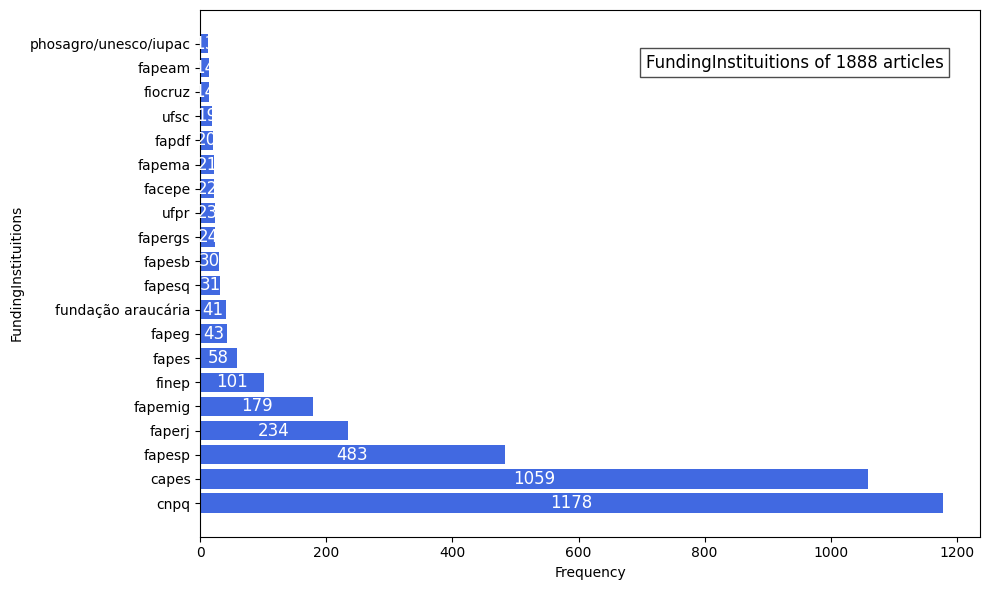

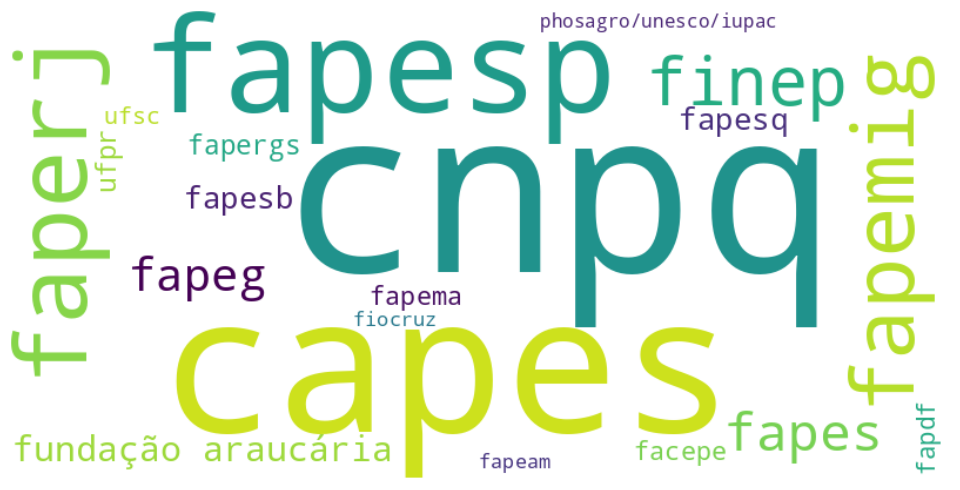

Counter({'cnpq': 1178, 'capes': 1059, 'fapesp': 483, 'faperj': 234, 'fapemig': 179, 'finep': 101, 'fapes': 58, 'fapeg': 43, 'fundação araucária': 41, 'fapesq': 31, 'fapesb': 30, 'fapergs': 24, 'ufpr': 23, 'facepe': 22, 'fapema': 21, 'fapdf': 20, 'ufsc': 19, 'fiocruz': 14, 'fapeam': 14, 'phosagro/unesco/iupac': 13, 'ufabc': 12, 'fapeal': 11, 'funcap': 11, 'inct midas': 10, 'inctaa': 9, 'n/a': 9, 'udesc': 9, 'inct nanocarbono': 9, 'ufrj': 8, 'fitej': 8, 'inct nanovida': 8, 'ufpa': 7, 'ufsj': 7, 'uff': 7, 'inct-catálise': 7, 'inct-cimol': 7, 'ufba': 6, 'ppgq-ufrgs': 6, 'l’oréal-unesco-abc': 6, 'faepex': 6, 'usp': 6, 'ufsm': 6, 'utfpr': 6, 'ppgq-uff': 6, 'ufpb': 5, 'ifrj': 5, 'sbq': 5, 'petrobras': 5, 'rede mineira de química': 5, 'ufmg': 5, 'lnls': 5, 'ufu': 5, 'unifesp': 5, 'funding institutions not explicitly mentioned': 4, 'pronex': 4, 'furb': 4, 'funcap (bp3-0139-00257.01.00/18)': 4, 'iq-ufu': 4, 'cme-ufpr': 4, 'ufam': 4, 'ufg': 4, 'inct-catalysis': 4, 'funape': 4, 'uerj': 4, 'loréal 

In [4]:
FundingInstituitions = data['Acknowledgments'].dropna()

all_FundingInstituitions = (FundingInstituitions.str.split(r'[;,]').explode().str.strip().str.lower().str.replace("'", ""))

all_FundingInstituitions = all_FundingInstituitions[all_FundingInstituitions != ""]
mapped_FundingInstituitions = all_FundingInstituitions.apply(lambda x: reverse_map_FundingInstituition(x, FundingInstitution_mapping))
FundingInstituition_counts_geral = Counter(mapped_FundingInstituitions)
top_FundingInstituitions = FundingInstituition_counts_geral.most_common(20)
#print(top_FundingInstituitions)
FundingInstituitions, counts = zip(*top_FundingInstituitions)

plot_FundingInstituition_bar(top_FundingInstituitions, context_label="FundingInstituitions of 1888 articles")
plot_FundingInstituition_wordcloud(dict(top_FundingInstituitions))
print(FundingInstituition_counts_geral)

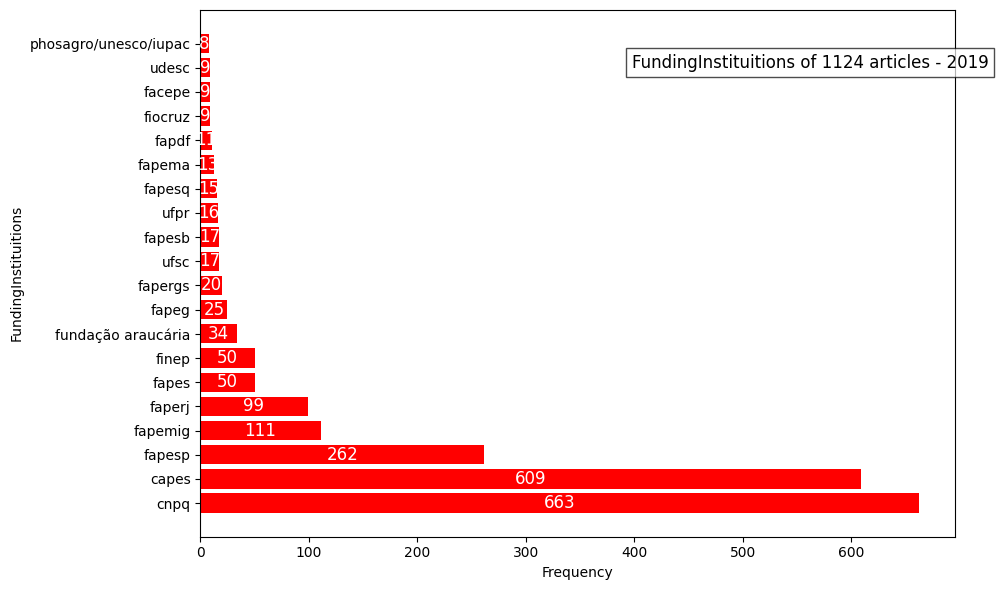

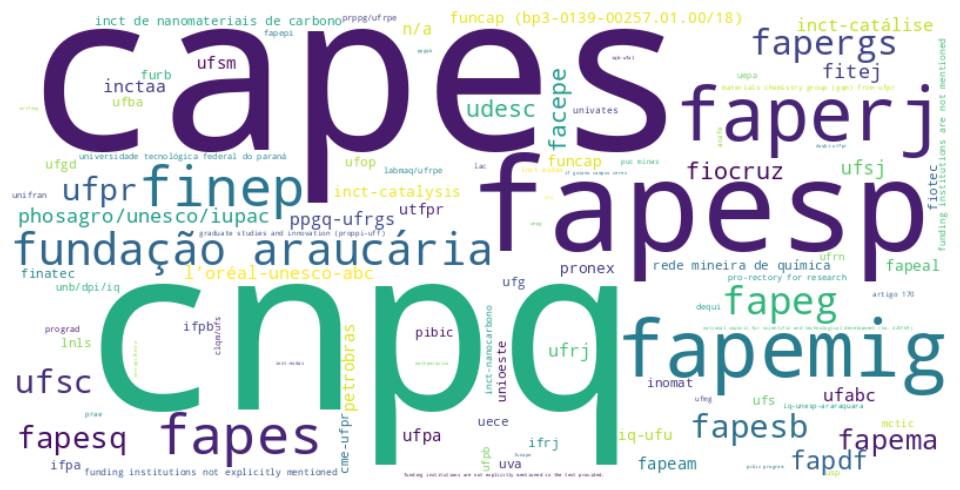

In [5]:
# Filter only articles from the year 2019
data_2019 = data[data['Year'] == 2019]


FundingInstituitions = data_2019['Acknowledgments'].dropna()
all_FundingInstituitions = (FundingInstituitions.str.split(r'[;,]').explode().str.strip().str.lower().str.replace("'", ""))

all_FundingInstituitions = all_FundingInstituitions[all_FundingInstituitions != ""]
# Apply reverse mapping to standardize FundingInstituition terms
mapped_FundingInstituitions = all_FundingInstituitions.apply(lambda x: reverse_map_FundingInstituition(x, FundingInstitution_mapping))
FundingInstituition_counts_2019 = Counter(mapped_FundingInstituitions)
top_FundingInstituitions = FundingInstituition_counts_2019.most_common(20)
FundingInstituitions, counts = zip(*top_FundingInstituitions)

plot_FundingInstituition_bar(top_FundingInstituitions, context_label="FundingInstituitions of 1124 articles - 2019", bar_color="red")
plot_FundingInstituition_wordcloud(FundingInstituition_counts_2019)


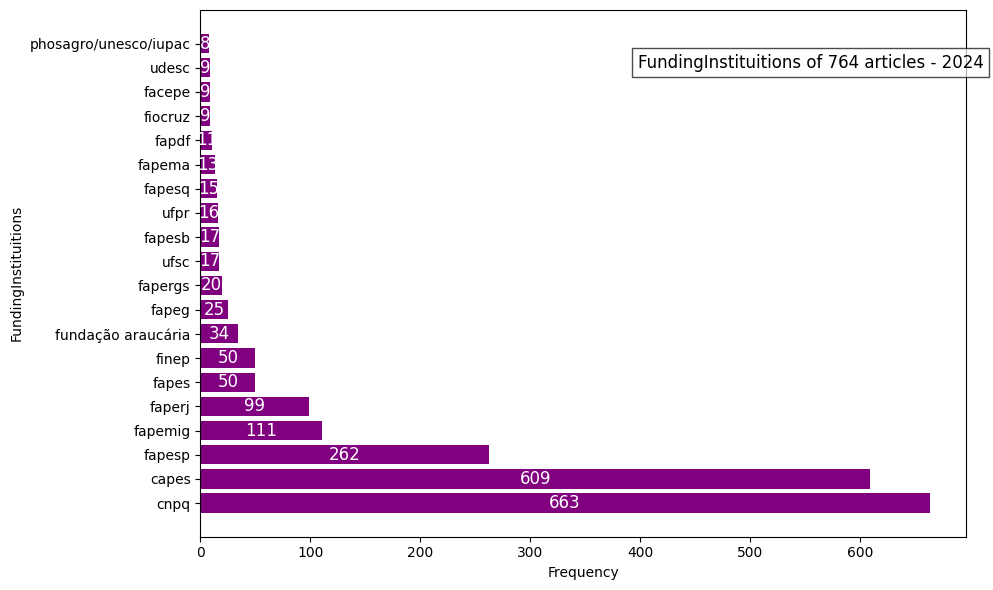

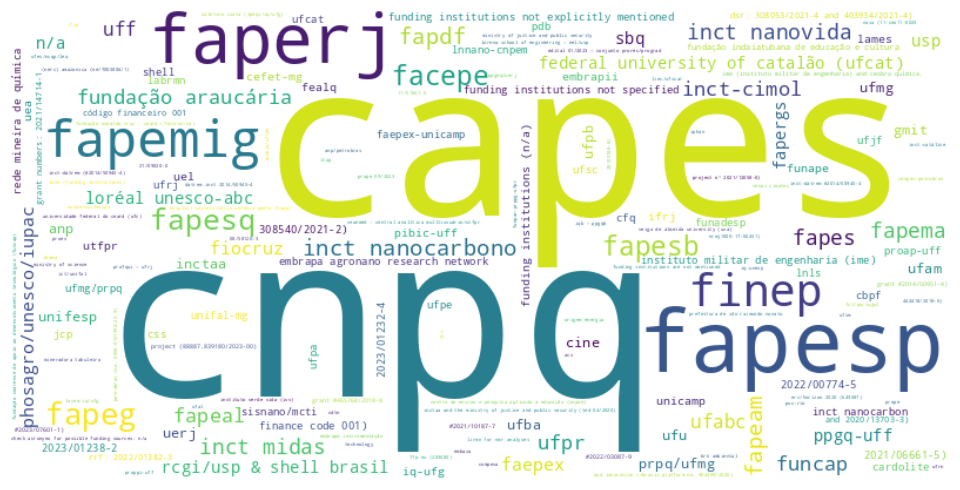

In [6]:
# Filter only articles from the year 2019
data_2019 = data[data['Year'] == 2024]

# Extract and process FundingInstituitions from the filtered DataFrame
FundingInstituitions = data_2019['Acknowledgments'].dropna()


all_FundingInstituitions = (FundingInstituitions.str.split(r'[;,]').explode().str.strip().str.lower().str.replace("'", ""))
all_FundingInstituitions = all_FundingInstituitions[all_FundingInstituitions != ""]

mapped_FundingInstituitions = all_FundingInstituitions.apply(lambda x: reverse_map_FundingInstituition(x, FundingInstitution_mapping))
FundingInstituition_counts_2024 = Counter(mapped_FundingInstituitions)
top_FundingInstituitions = FundingInstituition_counts_2019.most_common(20)
FundingInstituitions, counts = zip(*top_FundingInstituitions)

plot_FundingInstituition_bar(top_FundingInstituitions, context_label="FundingInstituitions of 764 articles - 2024", bar_color="purple")
plot_FundingInstituition_wordcloud(FundingInstituition_counts_2024)

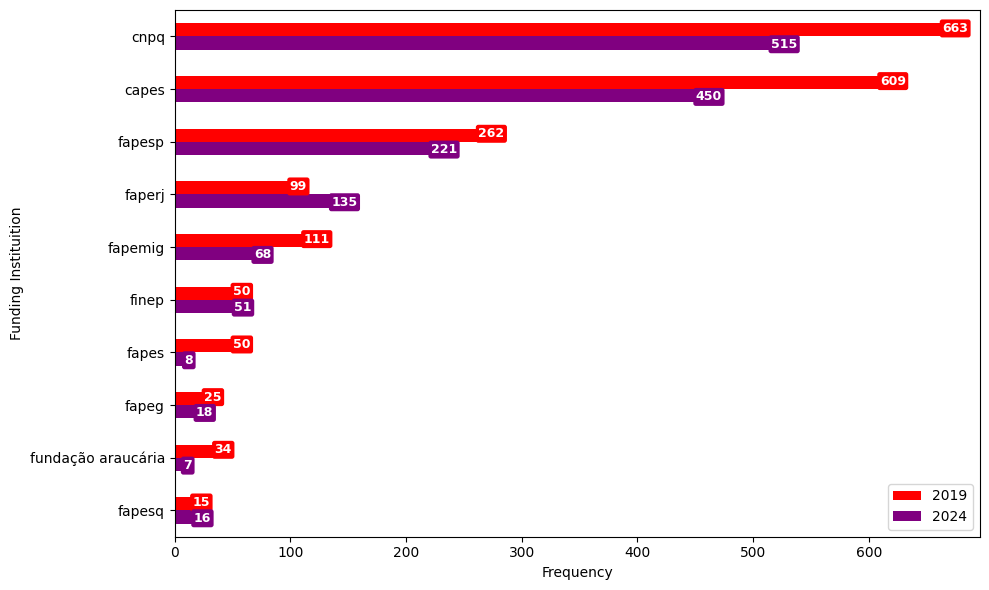

In [ ]:
from collections import Counter


plot_comparison_bar(
    counts_a=FundingInstituition_counts_2019,
    counts_b=FundingInstituition_counts_2024,
    label_a="2019",
    label_b="2024",
    #title="FundingInstituition Frequency Comparison: 2019 vs 2024"
)

In [ ]:
import csv
print(FundingInstituition_counts_2019)
FundingInstituition_counts_2019 = dict(FundingInstituition_counts_2019)
FundingInstituition_counts_2024 = dict(FundingInstituition_counts_2024)
# Calculate totals
total_2019 = sum(FundingInstituition_counts_2019.values())
total_2024 = sum(FundingInstituition_counts_2024.values())


all_areas = sorted(list(set(FundingInstituition_counts_2019.keys()) | set(FundingInstituition_counts_2024.keys())))


csv_rows = []
csv_rows.append(['Area Code', '2019 Count', '2019 Percentage (%)', '2024 Count', '2024 Percentage (%)', 'Percentage Change (2019 to 2024)','Total'])

for area in all_areas:
    count_2019 = FundingInstituition_counts_2019.get(area, 0)
    count_2024 = FundingInstituition_counts_2024.get(area, 0)

    percentage_2019 = (count_2019 / total_2019 * 100) if total_2019 > 0 else 0
    percentage_2024 = (count_2024 / total_2024 * 100) if total_2024 > 0 else 0

    percentage_change = percentage_2024 - percentage_2019

    csv_rows.append([
        area,
        count_2019,
        f"{percentage_2019:.2f}", 
        count_2024,
        f"{percentage_2024:.2f}",
        f"{percentage_change:.2f}",
        f"{count_2019,count_2024}"
    ])

# Define the output CSV file name
output_filename = 'research_Funding_comparison.csv'

# Write to CSV
with open(output_filename, 'w', newline='', encoding='utf-8') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerows(csv_rows)

print(f"CSV file '{output_filename}' created successfully!")
print(f"Total abstracts in 2019: {total_2019}")
print(f"Total abstracts in 2024: {total_2024}")



Counter({'cnpq': 663, 'capes': 609, 'fapesp': 262, 'fapemig': 111, 'faperj': 99, 'fapes': 50, 'finep': 50, 'fundação araucária': 34, 'fapeg': 25, 'fapergs': 20, 'ufsc': 17, 'fapesb': 17, 'ufpr': 16, 'fapesq': 15, 'fapema': 13, 'fapdf': 11, 'fiocruz': 9, 'facepe': 9, 'udesc': 9, 'phosagro/unesco/iupac': 8, 'fitej': 8, 'ufsj': 7, 'ppgq-ufrgs': 6, 'ufrj': 6, 'inctaa': 6, 'l’oréal-unesco-abc': 6, 'ufabc': 6, 'inct-catálise': 6, 'fapeam': 5, 'ufpa': 5, 'n/a': 5, 'petrobras': 5, 'ufsm': 5, 'fapeal': 4, 'pronex': 4, 'funcap (bp3-0139-00257.01.00/18)': 4, 'funcap': 4, 'iq-ufu': 4, 'utfpr': 4, 'inct-catalysis': 4, 'ufba': 3, 'finatec': 3, 'ifrj': 3, 'ifpa': 3, 'inct de nanomateriais de carbono': 3, 'furb': 3, 'ufop': 3, 'inomat': 3, 'rede mineira de química': 3, 'ufgd': 3, 'cme-ufpr': 3, 'pibic': 3, 'ufg': 3, 'ufs': 3, 'lnls': 3, 'fiotec': 3, 'uece': 3, 'uva': 3, 'ifpb': 3, 'unioeste': 3, 'ufrn': 2, 'ufpb': 2, 'unb/dpi/iq': 2, 'mctic': 2, 'funding institutions not explicitly mentioned': 2, 'inc